In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [125]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN


In [126]:
df.sample(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
2,NaN,NaN,NaN
12,NaN,CCAvg,Avg. spending on credit cards per month ($000)
19,NaN,CreditCard,Does the customer use a credit card issued by ...
6,NaN,ID,Customer ID
9,NaN,Income,Annual income of the customer ($000)
15,NaN,Personal Loan,Did this customer accept the personal loan off...
3,NaN,NaN,NaN
18,NaN,Online,Does the customer use internet banking facilit...
14,NaN,Mortgage,Value of house mortgage if any. ($000)
11,NaN,Family,Family size of the customer


In [127]:
'''
as we can see the excel has non standard
structure...looks like the data isn't
 formatted as a typical tabular
dataset where each row is an observation
and each column is a variable.

Let me guess maybe there is a
 metadata section

I should check the Excel manually

Ok so i viewed the excel file manually
And i find out there is two
Sheet one is  description and
Another is Data

Now i have to specify the "Data"
Sheet name inside the read_excel()
function
'''

'\nas we can see the excel has non standard \nstructure...looks like the data isn\'t\n formatted as a typical tabular \ndataset where each row is an observation \nand each column is a variable.\n\nLet me guess maybe there is a\n metadata section \n\nI should check the Excel manually\n\nOk so i viewed the excel file manually \nAnd i find out there is two \nSheet one is  description and\nAnother is Data \n\nNow i have to specify the "Data"\nSheet name inside the read_excel()\nfunction \n'

In [128]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [129]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [130]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4051,4052,55,29,162,93105,1,2.9,1,0,0,0,0,1,1
3848,3849,57,32,84,93106,4,1.3,3,0,0,0,0,0,1
1415,1416,33,8,48,94019,1,1.0,1,212,0,0,0,1,0
4337,4338,26,2,182,93010,2,3.2,2,0,1,0,0,0,0
1820,1821,47,22,25,90404,1,0.1,1,148,0,0,0,1,0


In [131]:
df.shape

(5000, 14)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [133]:
df = df.drop(columns=['ID','ZIP Code'],axis=1)

'''
Just for now i am keeping everything
Together  to see the Correlation

'''

'\nJust for now i am keeping everything \nTogether  to see the Correlation \n\n'

In [66]:

'''
calculating the correlation matrix
My friend if you don't know what is
Correlation matrix check out principle\n
Component Analysis(PCA)
'''

"\ncalculating the correlation matrix\nMy friend if you don't know what is\nCorrelation matrix check out principle\n\nComponent Analysis(PCA)\n"

In [134]:
correlation_matrix = df.corr()

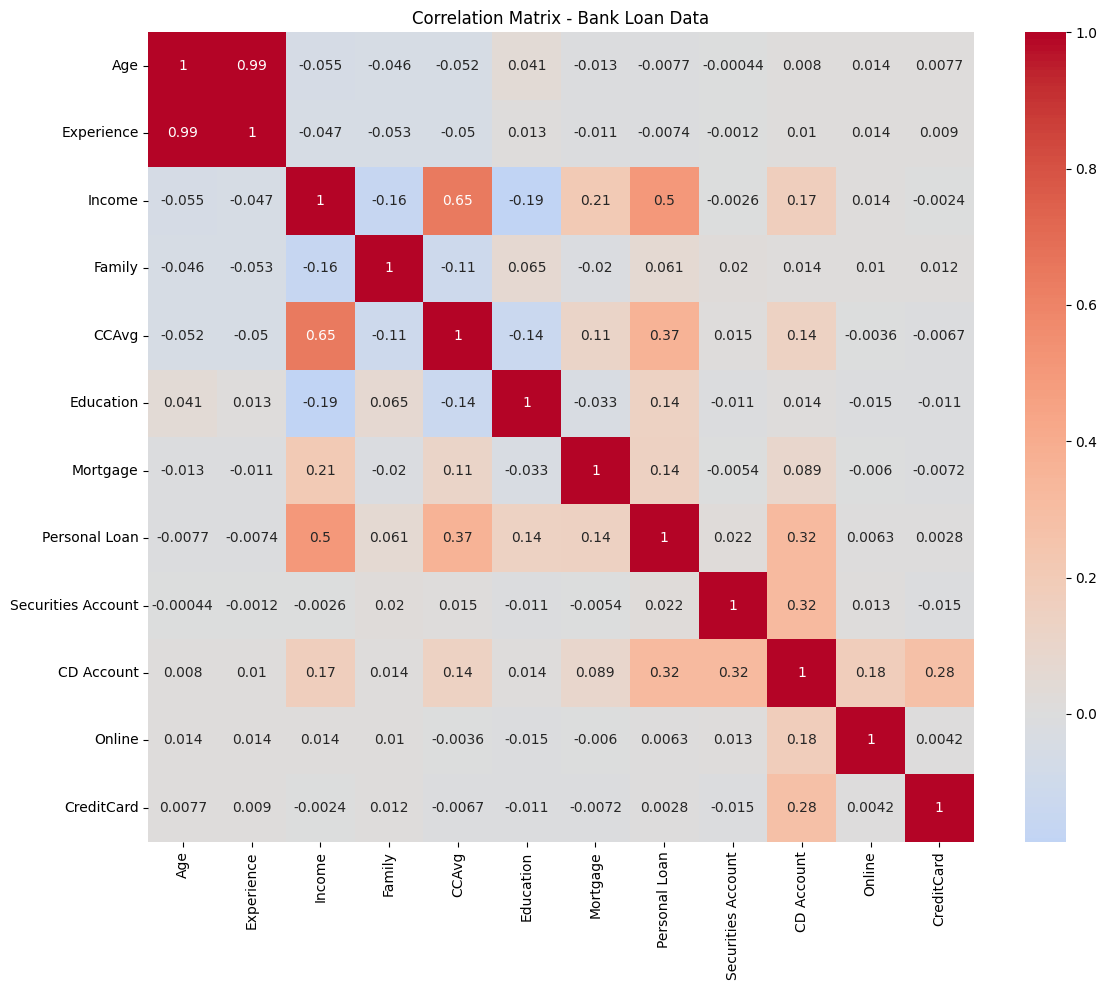

In [135]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Bank Loan Data')

plt.tight_layout()

plt.show()

In [136]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [137]:
x = df.drop(columns=["Experience","Personal Loan"])
x.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [138]:
y = df['Personal Loan']
y.sample(100)

,Personal Loan
2765,0
3584,0
471,0
1664,0
2706,0
...,...
3198,0
890,0
1797,0
2565,0


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [141]:

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [142]:
x_train

array([[ 0.8637215 , -1.10685405,  1.40631938, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [ 1.03798438, -0.95368438,  0.5356104 , ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [ 1.560773  , -0.23159879, -0.33509857, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       ...,
       [-0.18185576,  0.86247028, -0.33509857, ..., -0.2532849 ,
        -1.2189321 , -0.65153774],
       [-0.87890726,  1.71584415, -0.33509857, ..., -0.2532849 ,
         0.82039024, -0.65153774],
       [ 1.03798438, -0.95368438, -0.33509857, ..., -0.2532849 ,
        -1.2189321 , -0.65153774]])

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [145]:
y_pred = clf.predict(x_test)

In [146]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1340    3]
 [  21  136]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.87      0.92       157

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.96      1500
weighted avg       0.98      0.98      0.98      1500



In [152]:

# Sample 1: High-income professional
sample_1 = {
    'Age': 45,
    'Income': 224,  # $224K
    'Family': 4,
    'CCAvg': 4.5,   # Spends $4.5K/month on credit cards
    'Education': 2,
    'Mortgage': 540,
    'Securities Account': 0,
    'CD Account': 1,
    'Online': 1,
    'CreditCard': 1
}

# Sample 2: Young, low-income customer
sample_2 = {
    'Age': 25,
    'Income': 35,   # $35K
    'Family': 1,
    'CCAvg': 0.8,
    'Education': 1,
    'Mortgage': 0,
    'Securities Account': 0,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 0
}

# Sample 3: Mid-income family
sample_3 = {
    'Age': 35,
    'Income': 90,   # $90K
    'Family': 3,
    'CCAvg': 2.5,
    'Education': 2,
    'Mortgage': 200,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
}

# Sample 4: Wealthy retiree
sample_4 = {
    'Age': 62,
    'Income': 150,  # $150K
    'Family': 2,
    'CCAvg': 3.2,
    'Education': 3,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 1,
    'Online': 0,
    'CreditCard': 1
}

# Sample 5: Young professional, moderate income
sample_5 = {
    'Age': 30,
    'Income': 75,   # $75K
    'Family': 2,
    'CCAvg': 1.5,
    'Education': 2,
    'Mortgage': 150,
    'Securities Account': 0,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
}

In [172]:
from sklearn.svm import SVC

clf2 = SVC(kernel='rbf', C=1.0, random_state=42)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)

In [168]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1340    3]
 [  34  123]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.78      0.87       157

    accuracy                           0.98      1500
   macro avg       0.98      0.89      0.93      1500
weighted avg       0.98      0.98      0.97      1500



In [174]:



# Convert samples to DataFrame
raw_samples = pd.DataFrame([sample_1, sample_2, sample_3, sample_4, sample_5])

# Scale them
scaled_samples = scaler.transform(raw_samples)

# Make predictions
dt_preds = clf.predict(scaled_samples)
svm_preds = clf2.predict(scaled_samples)

for i in range(5):
    dt_result = "✓ ACCEPT" if dt_preds[i] == 1 else "✗ REJECT"
    svm_result = "✓ ACCEPT" if svm_preds[i] == 1 else "✗ REJECT"
    print(f"Sample {i+1}: DT={dt_result}, SVM={svm_result}")

Sample 1: DT=✓ ACCEPT, SVM=✓ ACCEPT
Sample 2: DT=✗ REJECT, SVM=✗ REJECT
Sample 3: DT=✗ REJECT, SVM=✗ REJECT
Sample 4: DT=✓ ACCEPT, SVM=✓ ACCEPT
Sample 5: DT=✗ REJECT, SVM=✗ REJECT


In [170]:

import pickle

# Save Decision Tree Model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
print("✓ Decision Tree model saved as 'decision_tree_model.pkl'")

# Save SVM Model
with open('svm_model1.pkl', 'wb') as file:
    pickle.dump(clf2, file)
print("✓ SVM model saved as 'svm_model.pkl'")

# Save Scaler (important for future predictions)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("✓ Scaler saved as 'scaler.pkl'")

print("\nAll models saved successfully!")
print("To load them later, use:")
print("  clf = pickle.load(open('decision_tree_model.pkl', 'rb'))")
print("  clf2 = pickle.load(open('svm_model.pkl', 'rb'))")
print("  scaler = pickle.load(open('scaler.pkl', 'rb'))")

✓ Decision Tree model saved as 'decision_tree_model.pkl'
✓ SVM model saved as 'svm_model.pkl'
✓ Scaler saved as 'scaler.pkl'

All models saved successfully!
To load them later, use:
  clf = pickle.load(open('decision_tree_model.pkl', 'rb'))
  clf2 = pickle.load(open('svm_model.pkl', 'rb'))
  scaler = pickle.load(open('scaler.pkl', 'rb'))
